In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import datetime
import seaborn as sns
import statsmodels.api as sm

from plotnine import * #Utilização das principais funcionalidades do ggplot2 nativo do R no python
from dplython import * 
from scipy.stats import norm

from sklearn.preprocessing import PowerTransformer
from pmdarima.model_selection import train_test_split



from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor

from sklearn.metrics import r2_score

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera
from statsmodels.compat import lzip

from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [38]:
db = pd.read_csv('database_mensal.csv')

In [39]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       70 non-null     object 
 1   price      70 non-null     float64
 2   petroleum  70 non-null     float64
 3   dolar      70 non-null     float64
 4   covid      70 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.9+ KB


In [40]:
db.isna().sum()

date         0
price        0
petroleum    0
dolar        0
covid        0
dtype: int64

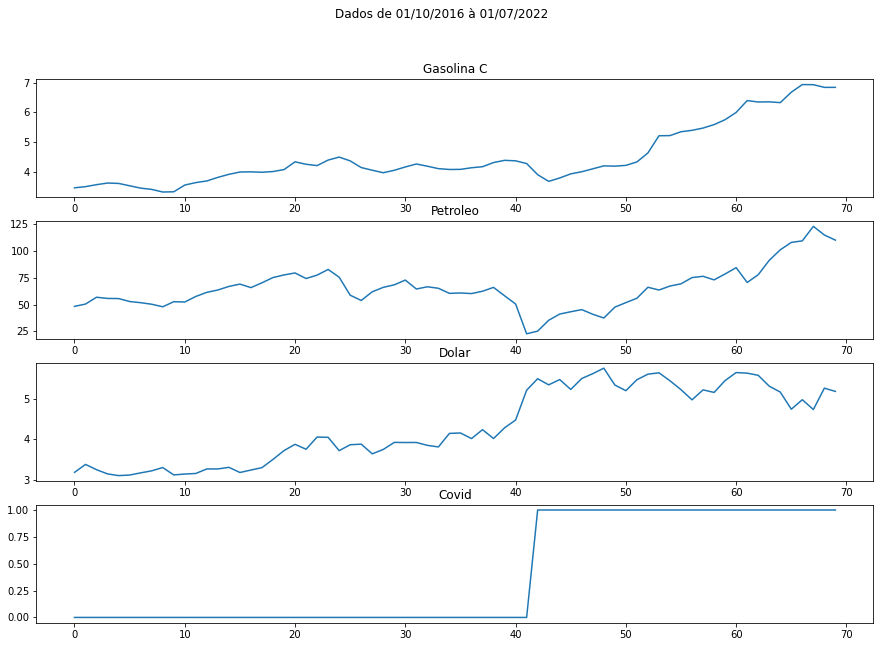

In [41]:
fig, axs = plt.subplots(4, figsize=(15,10))
fig.suptitle("Dados de 01/10/2016 à 01/07/2022")
x = db['date']
axs[0].set_title("Gasolina C")
axs[0].plot(db['price'])
axs[1].set_title("Petroleo")
axs[1].plot(db['petroleum'])
axs[2].set_title("Dolar")
axs[2].plot(db['dolar'])
axs[3].set_title("Covid")
axs[3].plot(db['covid'])

<AxesSubplot:>

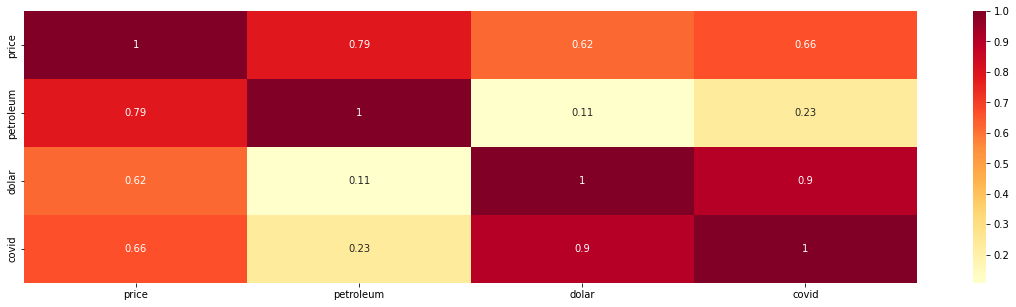

In [42]:
plt.figure(figsize=(20,5))
corr=db.corr()
sns.heatmap(corr, annot = True, cmap = "YlOrRd")

c:\Users\Gabriel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Gabriel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Gabriel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

<AxesSubplot:xlabel='dolar', ylabel='Density'>

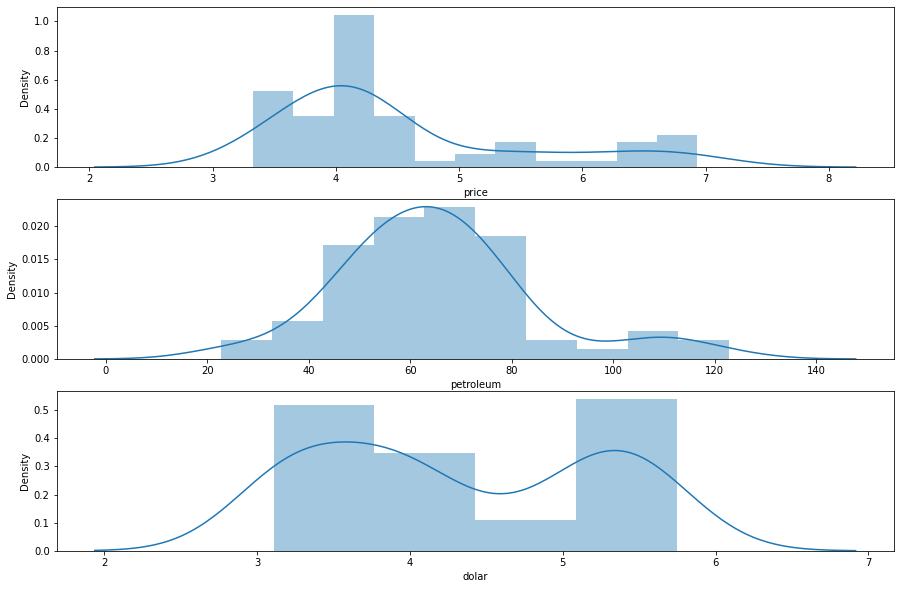

In [45]:
fig, axarr = plt.subplots(3, 1, figsize=(15,10))
sns.distplot(db['price'], ax=axarr[0] )
sns.distplot(db['petroleum'], ax=axarr[1])
sns.distplot(db['dolar'], ax=axarr[2])

<Figure size 1440x360 with 0 Axes>

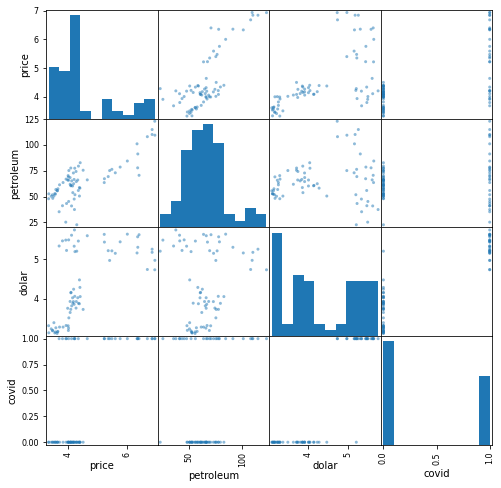

In [47]:
plt.figure(figsize=(20,5))
pd.plotting.scatter_matrix(db, figsize=(8,8))
plt.show()

In [70]:
# from pmdarima.model_selection import train_test_split

# # Tamanho da amostra de testes ( 80 e 20)
# test_size = round(db.shape[0] * 0.2)
# train_set, test_set = train_test_split(db, test_size=test_size)

In [98]:
# X = sm.add_constant(treino)
model=smf.ols(formula='price ~ dolar + petroleum + covid', data=db).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     211.3
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           9.01e-34
Time:                        19:01:19   Log-Likelihood:                -16.212
No. Observations:                  70   AIC:                             40.42
Df Residuals:                      66   BIC:                             49.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3312      0.414     -0.799      0.427      -1.158       0.496
dolar          0.5470      0.099      5.539      0.000       0.350       0.744
petroleum      0.0372      0.002     17.998      0.000       0.033       0.041
covid          0.0939      0.187      0.503      0.617      -0.279       0.467
==============================================================================
Omnibus:                        5.843   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.666
Skew:                           0.436   Prob(JB):                       0.0588
Kurtosis:                       4.088   Cond. No.                         828.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# X = sm.add_constant(treino)
model=smf.ols(formula='price ~ dolar', data=db).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     42.11
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           1.17e-08
Time:                        19:01:26   Log-Likelihood:                -81.989
No. Observations:                  70   AIC:                             168.0
Df Residuals:                      68   BIC:                             172.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5683      0.462      3.395      0.001       0.646       2.490
dolar          0.6780      0.104      6.489      0.000       0.470       0.886
==============================================================================
Omnibus:                        7.580   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.071
Skew:                           0.629   Prob(JB):                       0.0291
Kurtosis:                       3.917   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# X = sm.add_constant(treino)
model=smf.ols(formula='price ~ petroleum', data=db).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     109.6
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           8.12e-16
Time:                        19:01:36   Log-Likelihood:                -65.257
No. Observations:                  70   AIC:                             134.5
Df Residuals:                      68   BIC:                             139.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8565      0.264      7.045      0.000       1.331       2.382
petroleum      0.0405      0.004     10.469      0.000       0.033       0.048
==============================================================================
Omnibus:                        4.632   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.563
Skew:                           0.586   Prob(JB):                        0.102
Kurtosis:                       2.562   Cond. No.                         241.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# X = sm.add_constant(treino)
model=smf.ols(formula='price ~ covid', data=db).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     53.59
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           3.74e-10
Time:                        19:01:41   Log-Likelihood:                -78.515
No. Observations:                  70   AIC:                             161.0
Df Residuals:                      68   BIC:                             165.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9641      0.116     34.087      0.000       3.732       4.196
covid          1.3461      0.184      7.321      0.000       0.979       1.713
==============================================================================
Omnibus:                        0.182   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.913   Jarque-Bera (JB):                0.004
Skew:                           0.010   Prob(JB):                        0.998
Kurtosis:                       3.029   Cond. No.                         2.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
def step(X, y,significancia=0.05):
    lista_inicial = []
    incluidos = list(lista_inicial)
    while True:
        modificado=False
        excluidos = list(set(X.columns) - set(incluidos))
        novo_pvalue = pd.Series(index = excluidos, dtype='float32')
        for nova_coluna in excluidos:
            modelo = sm.OLS(y, sm.add_constant(pd.DataFrame(X[incluidos + [nova_coluna]]))).fit()
            novo_pvalue[nova_coluna] = modelo.pvalues[nova_coluna]
        melhor_pvalue = novo_pvalue.min()
        if melhor_pvalue < significancia:
            melhor_caracteristica = novo_pvalue.idxmin()
            incluidos.append(melhor_caracteristica)
            modificado=True            

        if not modificado:
            break

    return incluidos


x =  db[['petroleum', 'covid', 'dolar']]
y = db['price']

step(x, y)

['petroleum', 'dolar']

In [109]:
# X = sm.add_constant(treino)
model_step=smf.ols(formula='price ~ petroleum + dolar', data=db).fit()
model_step.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     320.4
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           5.03e-35
Time:                        19:03:13   Log-Likelihood:                -16.346
No. Observations:                  70   AIC:                             38.69
Df Residuals:                      67   BIC:                             45.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5099      0.212     -2.407      0.019      -0.933      -0.087
petroleum      0.0375      0.002     19.238      0.000       0.034       0.041
dolar          0.5921      0.041     14.283      0.000       0.509       0.675
==============================================================================
Omnibus:                        3.816   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                3.170
Skew:                           0.323   Prob(JB):                        0.205
Kurtosis:                       3.818   Cond. No.                         392.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
from scipy import stats

stats.shapiro(model_step.resid)

ShapiroResult(statistic=0.9693917632102966, pvalue=0.08419483155012131)

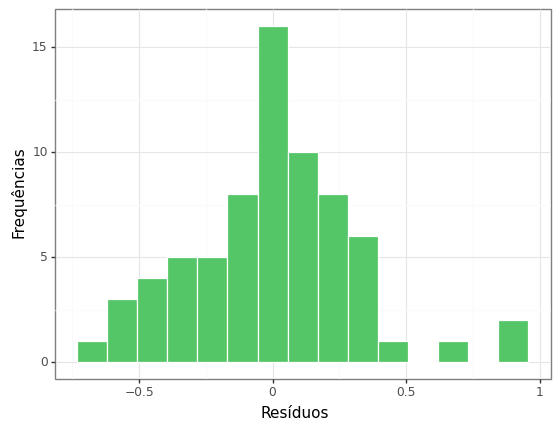

<ggplot: (140051578421)>

In [113]:


(ggplot(db >>
  mutate(residuos = model_step.resid),
        aes(x='residuos')) +
    geom_histogram(color = "white", 
                   fill = "#55C667FF", 
                   bins = 15,
                   alpha = 0.6) +
    labs(x = "Resíduos",
         y = "Frequências") + 
    theme_bw())



c:\Users\Gabriel\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


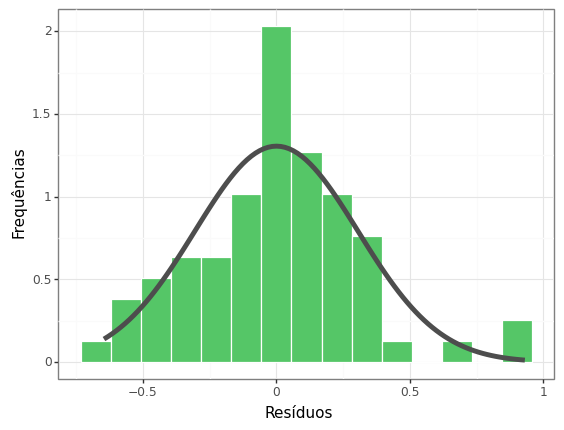

<ggplot: (140051555253)>

In [112]:


(ggplot(db >>
  mutate(residuos = model_step.resid),
        aes(x='residuos')) +
    geom_histogram(aes(y ='..density..'),
                   color = "white", 
                   fill = "#55C667FF", 
                   bins = 15,
                   alpha = 0.6) +
     stat_function(fun=norm.pdf,
                   args={'loc':np.mean(model_step.resid),
                         'scale':np.std(model_step.resid)},
                size = 2, color = "#4d4d4d") +
     scale_color_manual(values = "#7f7f7f") +
    labs(x = "Resíduos",
         y = "Frequências") + 
    theme_bw())



In [108]:
test = sms.het_breuschpagan(model.resid, model.model.exog)

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
lzip(names, test)

[('Lagrange multiplier statistic', 7.719713832082898),
 ('p-value', 0.021071014231485),
 ('f-value', 4.152363922630736),
 ('f p-value', 0.019950819519397787)]

c:\Users\Gabriel\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:412: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


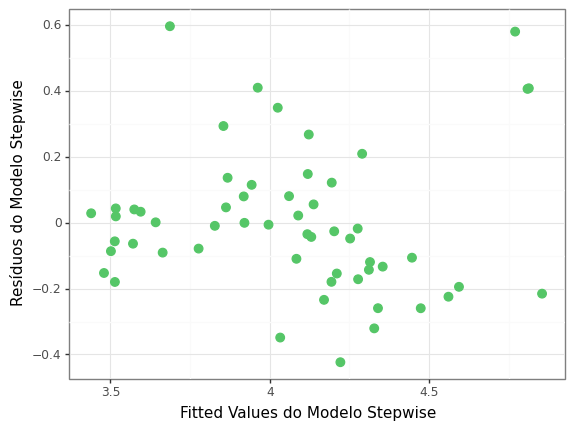

<ggplot: (140051448664)>

In [91]:
(ggplot(db >>
  mutate(fittedvalues = model.fittedvalues,residuos=model.resid),
        aes(x='fittedvalues',y='residuos')) +
 geom_point(color = "#55C667FF", size = 3) +
  labs(x = "Fitted Values do Modelo Stepwise",
       y = "Resíduos do Modelo Stepwise") +
  theme_bw())

In [95]:
pt = PowerTransformer(method='box-cox', standardize=False)
pt.fit(db['price'].values.reshape(-1, 1))

PowerTransformer(method='box-cox', standardize=False)

In [96]:
lambda_bc=pt.lambdas_
lambda_bc

array([-2.44342468])